```
Poisson ex --->
                ---> Neuron 1 ---> Neuron 2. <-- Multimeter
Poisson in --->
```

Create nodes

In [1]:
import nest
import pylab

neuron1 = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")
noise_ex = nest.Create("poisson_generator", params={"rate": 80000.0})
noise_in = nest.Create("poisson_generator", params={"rate": 15000.0})
multimeter = nest.Create("multimeter", params={"withtime": True, "record_from": ["V_m"]})
spikedetector = nest.Create("spike_detector",params={"withgid": True, "withtime": True})
spikedetector2 = nest.Create("spike_detector",params={"withgid": True, "withtime": True})


Set neurons status

In [2]:
nest.SetStatus(neuron1, {"I_e": 0.0})
nest.SetStatus(neuron2, {"I_e": 0.0})

Connect Signal generators to neuron1

In [3]:
nest.Connect(noise_ex, neuron1, syn_spec={"weight": 1.2})
nest.Connect(noise_in, neuron1, syn_spec={"weight": -2.0})

Connect the two neurons (weight 200, delay 10ms)

In [4]:
nest.Connect(neuron1, neuron2, syn_spec={"weight":500, "delay":50.0})

Connect Multimeter and Spike Detector to measure neurons output.


In [5]:
nest.Connect(multimeter, neuron1)
nest.Connect(multimeter, neuron2)
nest.Connect(neuron1, spikedetector)
nest.Connect(neuron2, spikedetector2)

Run Simulation

In [6]:
nest.Simulate(1000.0)

Recover data from simulation and plot.

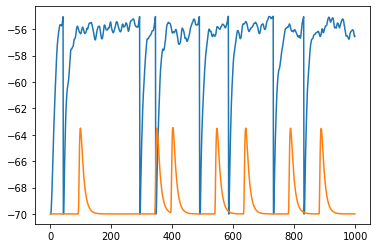

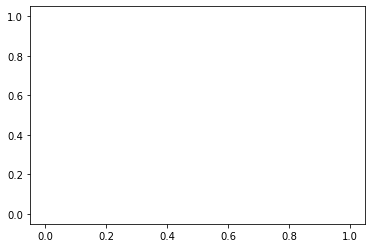

In [7]:
pylab.figure(1)
dmm = nest.GetStatus(multimeter)[0]
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
pylab.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
pylab.plot(ts2, Vms2)
pylab.show()

pylab.figure(2)

dSD = nest.GetStatus(spikedetector,keys="events")[0]
dSD2 = nest.GetStatus(spikedetector2,keys="events")[0]
evs = dSD["senders"]
tss = dSD["times"]
evs2 = dSD2["senders"]
tss2 = dSD2["times"]
#pylab.plot(tss, evs, "*")
pylab.plot(tss2, evs2, ".")
pylab.show()